<a href="https://colab.research.google.com/github/sdpapas3/Cheemsificador/blob/main/Cheemsificador_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>CHEEMSIFICADOR</h1>
<h2>Haganle un cheems</h2>

<b>Ejecutar para importar las librerías necesarias</b>

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

**Copiar esta carpeta a su Google Drive** https://drive.google.com/drive/folders/141RyKIWrMAsWoTCNtqH9yuvrzh85QHQU?usp=sharing

Entrar con su cuenta de Google y copiar el código que les aparezca en el recuadro para importar sus archivos de Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<b>Celda para btener máscara de recorte basado en el color de piel de la imagen seleccionada.</b> <br> -Elegir una imagen donde se distingan bien los colores, la cara este cerca y sea aproximadamente de tamaño cuadrada<br> -Subir el archivo a su Drive y editar la ruta de abajo por la ruta de su imagen

1000000


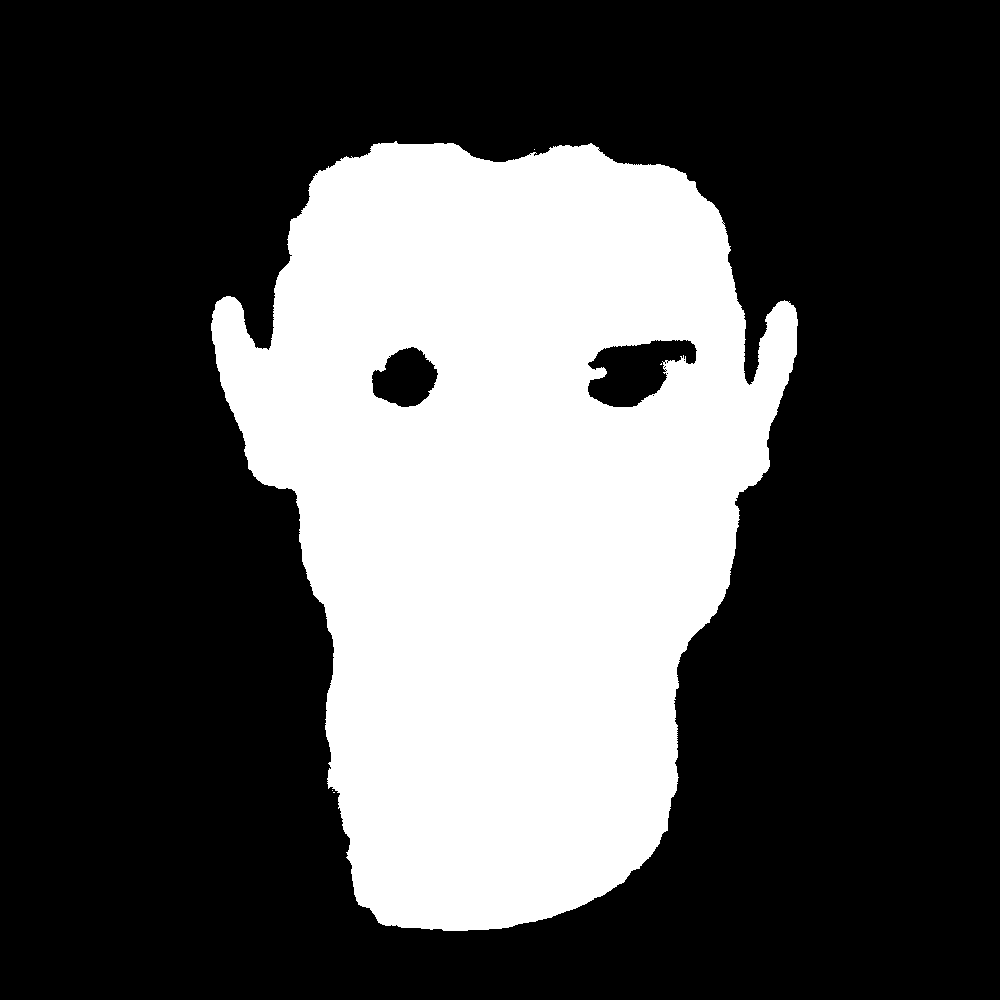

True

In [50]:

min_YCrCb = np.array([0,133,77],np.uint8)
max_YCrCb = np.array([235,173,127],np.uint8)

size = (1000,1000)

image = cv.imread("/content/drive/MyDrive/Cheems/peter(2).jpg") #FOTO DE TU CARA :)
image = cv.resize(image,size)

YCrCb = cv.cvtColor(image,cv.COLOR_BGR2YCR_CB)
mask = cv.inRange(YCrCb,min_YCrCb,max_YCrCb)



tex_image = cv.imread("/content/drive/MyDrive/Cheems/pelote.jpg") #imagen de la textura a utilizar (cheems en este caso)
tex_image = cv.resize(tex_image,size)


print(mask.size)

AUTO = 0


#mask = cv.erode(mask,None,iterations = 1)    

cv2_imshow(mask);
cv.imwrite("./mask.jpg", mask)

<b>Celda para cargar mascara y mostrar</b>

1000000


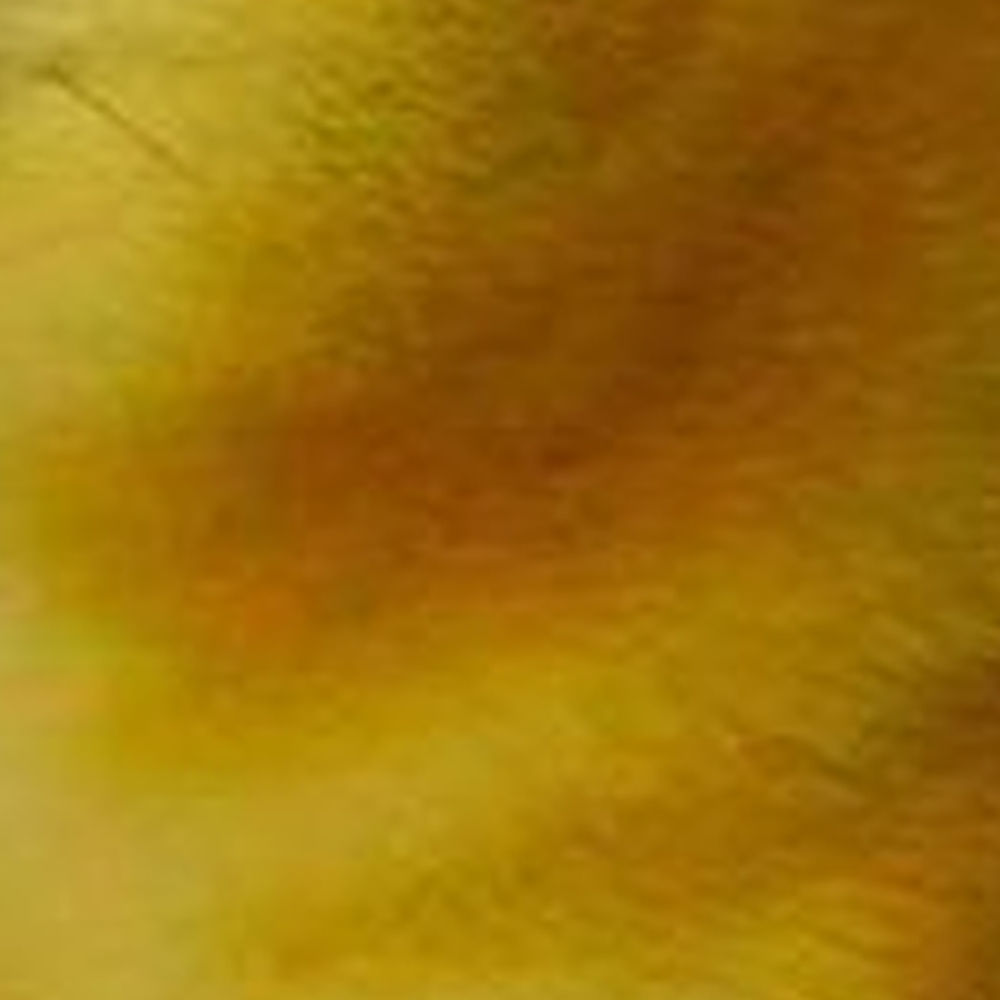

In [51]:

mask2 = cv.imread("./mask.jpg")
mask2 = cv.resize(mask2,size)

print(mask.size)
cv2_imshow(tex_image);



<b>Celda para insertar la textura sobre la imagen cargada</b>

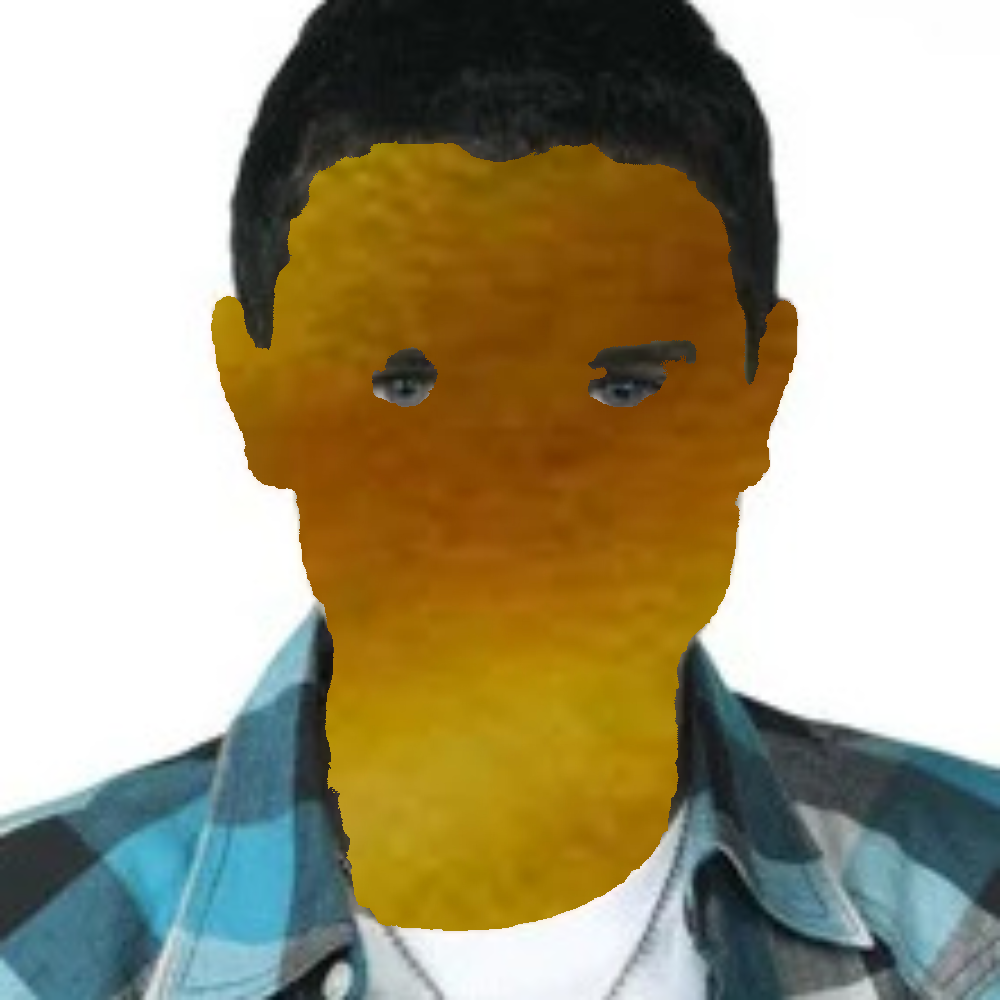

True

In [52]:



piel = cv.bitwise_and(tex_image,tex_image,mask = mask).copy()


nopiel = cv.bitwise_and(image,image,mask = cv.bitwise_not(mask)).copy()

merged = cv.add(piel,nopiel)
cv2_imshow(merged)
cv.imwrite("./skin.jpg", image)

<b>Para calcular la posición de la boca automaticamente ejecute esta celda</b><br>
-Puede desactivar nuevamente esta opción cambiando el valor de AUTO por 0<br>
-Cambiar el valor de angulo dependiendo de hacia donde este mirando el sujeto de la imagen:<br>

*   0: hacia al frente.
*   1: hacia la izquierda.
*   2: hacia la derecha.





In [53]:
AUTO = 1

angulo = 0

Ejecute la siguiente celda solo si se tiene activado el modo automatico

516 545


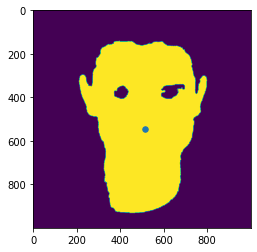

In [54]:

leftflag=1
rightflag=1
upperflag=1
lowerflag=1

leftborder=0
rightborder=1000
upperborder=0
lowerborder=1000


i=0
while i < 500:
  if mask[(500,500-i)] != 255 and leftflag:
    leftborder=500-i
    leftflag=0
  if mask[(500,500+i)] != 255 and rightflag:
    rightborder=500+i
    rightflag=0
  if mask[(500-i,500)] != 255 and upperflag:
    upperborder=500-i
    upperflag=0
  if mask[(500+i,500)] != 255 and lowerflag:
    lowerborder=500+i
    lowerflag = 0
  i += 1
if angulo == 1:
  auto_x=leftborder+20
elif angulo == 2:
  auto_x=rightborder-20
else:
  auto_x=int((leftborder+rightborder)/2)
auto_y=int((lowerborder+upperborder)/2)

#print(leftborder)
#plt.imshow(mask)
#plt.scatter(leftborder,500,30)
#plt.show(1000)
#print(rightborder)
#plt.imshow(mask)
#plt.scatter(rightborder,500,30)
#plt.show(1000)
#print(upperborder)
#plt.imshow(mask)
#plt.scatter(500,upperborder,30)
#plt.show(1000)
#print(lowerborder)
#plt.imshow(mask)
#plt.scatter(500,lowerborder,30)
#plt.show(1000)
print(auto_x,auto_y)
plt.imshow(mask)
plt.scatter(auto_x,auto_y,30)
plt.show(1000)

<b>Con ayuda del plano cartesiano, ubicar las coordenadas aproximadas donde se va a querer situar la boca (Ejecutar celda para obtener los datos a agregar en la siguiente, en caso de no haber elegido el modo automatico)</b>

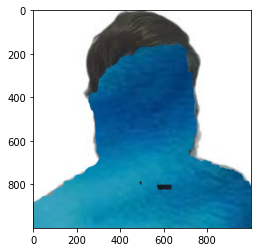

In [37]:


plt.imshow(merged)
plt.show(1000)


<b>Celda para agregar boca encima de la imagen previamente modificada</b>
<br>-Modificar los valores de las variables posx, posy,    <br>agregando las coordenadas x, y calculadas con el plano mostrado en la celda anterior.
<br>-Modificar el tamaño de la boca cambiando el porcentaje del tamaño. Por default se encuentra en 100 pero puede ser alterado manualmente.

<br>-Modificar las rutas de la boca y de la mascara de la boca segun se desee:
<ul>
<li>  bocaL.jpg y bocamaskL.jpg: Boca hacia la izquierda</li>
<li>bocaR.jpg y bocamaskR.jpg: Boca hacia la derecha</li>
</ul>




(435, 268)
(268, 435, 3)


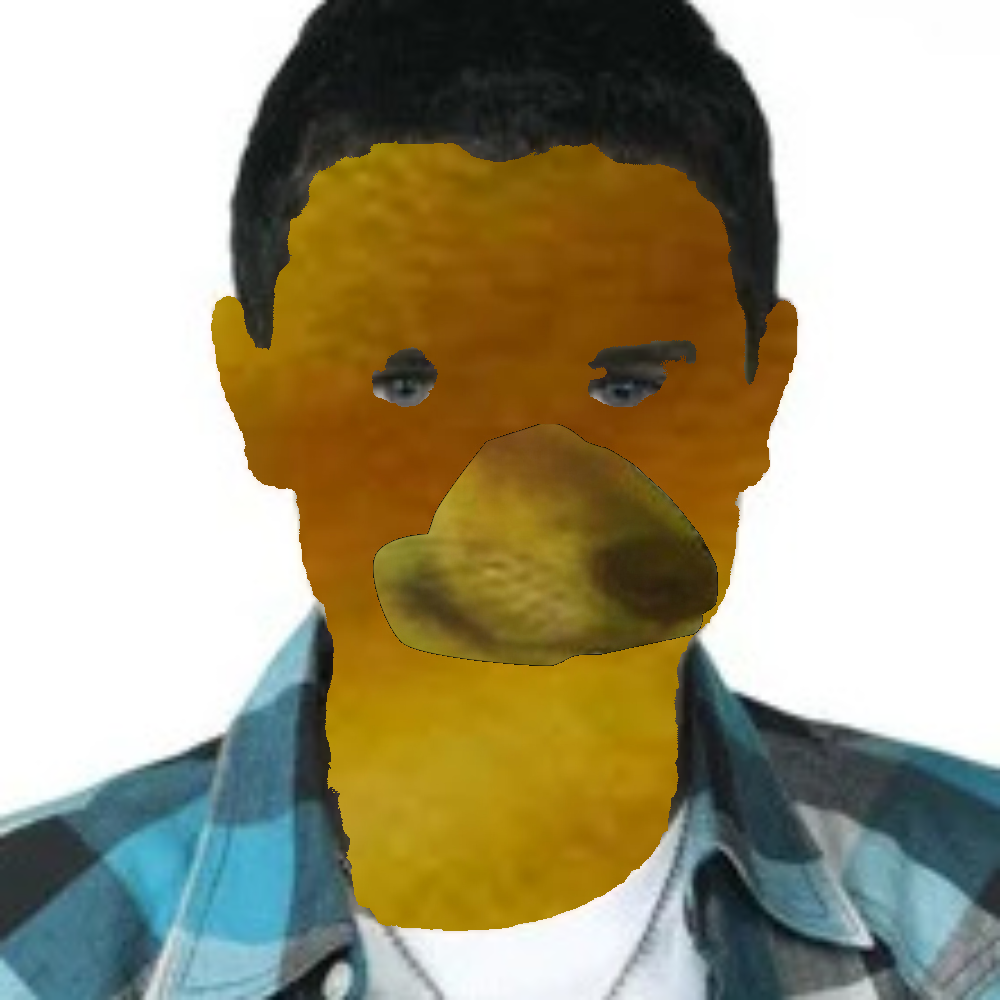

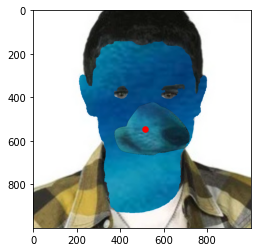

In [63]:


boca = cv.imread("/content/drive/MyDrive/Cheems/bocaR.jpg")
bocamask = cv.imread("/content/drive/MyDrive/Cheems/bocamaskR.jpg")



##editar los valores posx, posy con los de las coordenadas que desee
posx=480
posy=580

##editar el porcentaje segun se desee
tamaño_porcentaje = 100
tamaño_boca = (int(boca.shape[1]*(tamaño_porcentaje/100)),int(boca.shape[0]*(tamaño_porcentaje/100)));
print(tamaño_boca)


if AUTO == 1:
  posx=auto_x
  posy=auto_y

boca = cv.resize(boca,tamaño_boca)
bocamask = cv.resize(bocamask,tamaño_boca)




##520570

boca_centered = np.zeros((1000,1000,3), np.uint8)
bocamask_centered = np.zeros((1000,1000,3), np.uint8)

print(boca.shape)

centerx=int(boca.shape[1]/2)
centery=int(boca.shape[0]/2)

for i in range(0,boca.shape[1]):
  for j in range(0,boca.shape[0]):

    bocamask_centered[j+posy-centery][i+posx-centerx] = bocamask[j][i]
    boca_centered[j+posy-centery][i+posx-centerx] = boca[j][i]
   
white = np.array([255,255,255],np.uint8)
bocamask_centered = cv.inRange(bocamask_centered,np.array([0,32,32],np.uint8),white)

#cv2_imshow(bocamask_centered);


newimage = merged.copy()


noboca = cv.bitwise_and(newimage,newimage,mask = cv.bitwise_not(bocamask_centered)).copy()
newimage = cv.add(noboca,boca_centered)

#cv2_imshow(noboca);

cv2_imshow(newimage);
cv.imwrite("./final.jpg", newimage)

plt.imshow(newimage)
plt.scatter(auto_x,auto_y,30,color='red')
plt.show(1000)
